Cluster centers:  [18.82964202 51.83738595] [64.14564261 24.93215498] [70.08263435 77.24790051]


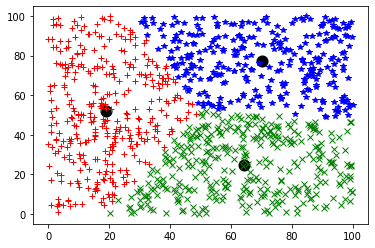

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.random.rand(1000, 2) * 100

kmeans = KMeans(n_clusters=3, init='random')
kmeans.fit(data)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

print("Cluster centers: ", *centers)
colors = ['r', 'g', 'b']
markers = ['+', 'x', '*']

for i in range(len(data)):
  plt.plot(data[i][0], data[i][1], color=colors[labels[i]], marker=markers[labels[i]])

plt.scatter(centers[:, 0], centers[:, 1], color='#000000', marker='o', s=50, linewidths=5)
plt.show()

In [10]:
l = [1, 2, 3]
print(l)
print(*l)

[1, 2, 3]
1 2 3


Cluster centers:  [ 47.34707332 144.73703662] [157.27456768  58.76331469] [56.78713725 43.61963964] [149.42283669 150.92731243]


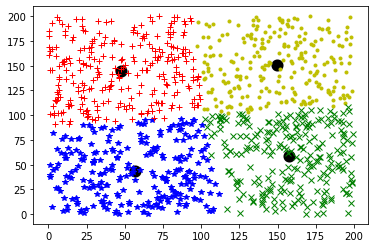

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# generate 1000 2d data points in the range of 0-200 randomly
data = np.random.rand(1000, 2) * 200

kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(data)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

print("Cluster centers: ", *centers)

colors = ['r', 'g', 'b', 'y']
markers = ['+', 'x', '*', '.']
for i in range(len(data)):
  plt.plot(data[i][0], data[i][1], color=colors[labels[i]], marker=markers[labels[i]])

plt.scatter(centers[:, 0], centers[:, 1], color='#000000', marker='o', s=50, linewidths=5)
plt.show()

1. Write a Python program to implement K-means clustering algorithm  
    * Generate 10000 2D data points in the range 0-100 randomly
    * Divide data points into 5 clusters
    * find the time taken by an algorithm to find clusters
 

Average Time Taken: 0.17882375717163085
Cluster centers:  [75.5939405  24.21790928] [15.97479279 73.78295638] [24.91300146 24.28117096] [83.78541533 74.83082293] [49.19913815 72.45678477]


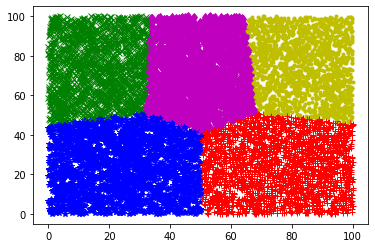

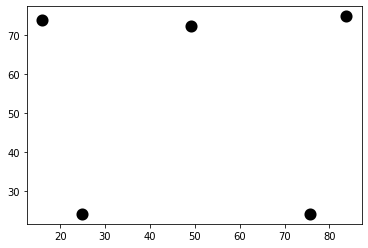

In [31]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.random.rand(10000, 2) * 100

kmeans = KMeans(n_clusters=5, init='random')

# run algorithm multiple times
# store execution time and compute average
time_taken = []

for i in range(5):
    start_time = time.time()
    kmeans.fit(data)
    end_time = time.time()
    tt = end_time - start_time
    time_taken.append(tt)

average_tt = np.array(time_taken).mean()
print(f"Average Time Taken: {average_tt}")

centers = kmeans.cluster_centers_
labels = kmeans.labels_

print(f"Cluster centers: ", *centers)

colors = ['r', 'g', 'b', 'y', 'm']
markers = ['+', 'x', '*', '.', 'd']

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], color=colors[labels[i]], marker=markers[labels[i]])

plt.show()

plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='o', s=50, linewidths=5)
plt.show()

Mini-batch k means

[0.05202333927154541, 0.07391777038574218, 0.06381268501281738, 0.04528319835662842, 0.6585983276367188, 0.33721420764923093, 0.23917546272277831, 0.4311575174331665, 0.21791596412658693, 0.21568713188171387, 0.1261446714401245, 0.17103369235992433, 0.15248184204101561, 0.1604001760482788, 0.09117488861083985, 0.187086820602417, 0.23616178035736085, 0.20060501098632813, 0.23798761367797852, 0.18409063816070556, 0.10558884143829346, 0.15457983016967775, 0.3149059057235718, 0.16890735626220704, 0.11807515621185302, 0.09027707576751709, 0.1270458698272705, 0.10167863368988037, 0.14521276950836182]
min: 0.04528319835662842
min index: 3
bs: 250
Cluster centers:  [75.5939405  24.21790928] [15.97479279 73.78295638] [24.91300146 24.28117096] [83.78541533 74.83082293] [49.19913815 72.45678477]


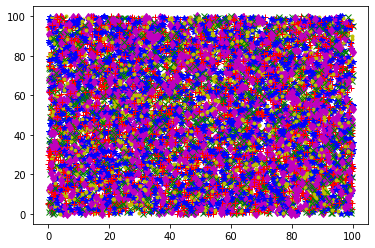

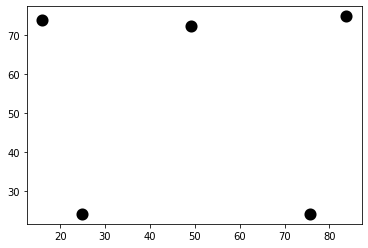

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import time

data = np.random.rand(10000, 2) * 100

bs = 100
diff_bs_time_taken = []
while(bs <= 1500):
        mini_batch_kmeans = MiniBatchKMeans(n_clusters=5, init='random', batch_size=bs)
        time_taken = []

        #run clustering algorithm 5 times to get average time taken
        for i in range(10):
            start = time.time()
            mini_batch_kmeans.fit(data)
            end = time.time()
            tt = end - start
            time_taken.append(tt)
        avg_time_taken = np.array(time_taken).mean()
        diff_bs_time_taken.append(avg_time_taken)
        bs += 50
    
print(diff_bs_time_taken);
min_time = np.array(diff_bs_time_taken).min()

print(f'min: {min_time}')
min_index = diff_bs_time_taken.index(min_time)

print(f'min index: {min_index}')
bs = 100 + min_index * 50
print(f'bs: {bs}')

centers = kmeans.cluster_centers_
labels = kmeans.labels_

print("Cluster centers: ", *centers)
colors = ['r', 'g', 'b', 'y', 'm']
markers = ['+', 'x', '*', '.', 'd']

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], color=colors[labels[i]],marker=markers[labels[i]])

plt.show()
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='o', s=50, linewidths=5)
plt.show()

K Mediod

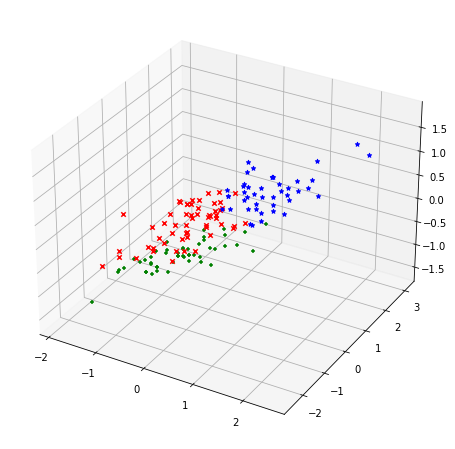

Rand_Index: 0.8367785234899329
Homogeneity_Score: 0.6672491406379297
Completeness_Score: 0.6701843437329579
Silhoutte_Coefficient: 0.4590416105554613


In [35]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

iris_data = load_iris()
x = iris_data.data
y = iris_data.target

sc = StandardScaler().fit(x)
sx = sc.transform(x)
km = KMedoids(n_clusters=3)
km.fit(sx)
py = km.fit_predict(sx)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['g', 'r', 'b']
markers = ['+', 'x', '*']

for i in range(len(sx)):
    ax.scatter(sx[i][0], sx[i][1], sx[i][2], color=colors[py[i]], marker=markers[py[i]])

plt.show()

rs = metrics.rand_score(y, py)
print(f'Rand_Index: {rs}')

hs = metrics.homogeneity_score(y, py)
print(f'Homogeneity_Score: {hs}')

cs = metrics.completeness_score(y, py)
print(f'Completeness_Score: {cs}')

silc = metrics.silhouette_score(sx, py, metric='euclidean')
print(f'Silhoutte_Coefficient: {silc}')

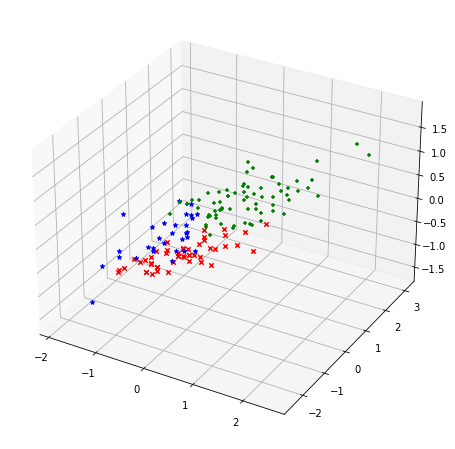

Rand_Index: 0.8252348993288591
Homogeneity_Score: 0.6578818079976051
Completeness_Score: 0.6940248415952218
Silhoutte_Coefficient: 0.4466890410285909


In [38]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

iris_data = load_iris()
x = iris_data.data
y = iris_data.target
sc = StandardScaler().fit(x)
sx = sc.transform(x)
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(sx)
py = ac.fit_predict(sx)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['g', 'r', 'b']
markers = ['+', 'x', '*']

for i in range(len(sx)):
    ax.scatter(sx[i][0], sx[i][1], sx[i][2], color=colors[py[i]], marker=markers[py[i]])

plt.show()

rs = metrics.rand_score(y, py)
print(f'Rand_Index: {rs}')

hs = metrics.homogeneity_score(y, py)
print(f'Homogeneity_Score: {hs}')

cs = metrics.completeness_score(y, py)
print(f'Completeness_Score: {cs}')

silc = metrics.silhouette_score(sx, py, metric='euclidean')
print(f'Silhoutte_Coefficient: {silc}')